In [75]:
import pandas as pd

In [76]:
#load dataset
data = pd.read_csv("/content/customer_churn_large_dataset.csv")

In [77]:
# Lets quickly do the basic data exploration task
data.info()

data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [78]:
# Handeling missing data

data.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

# **As no missing values were found, we will now move on for outliers**

In [79]:
#handeling outliers

import matplotlib.pyplot as plt


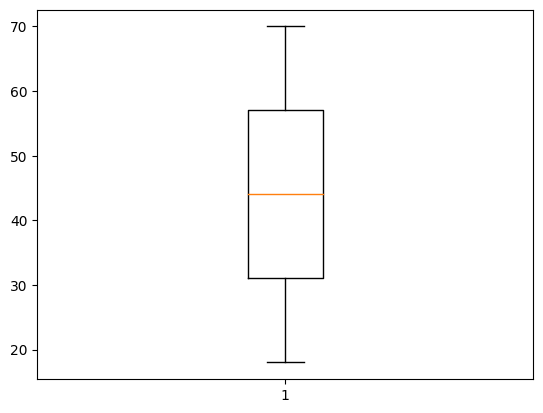

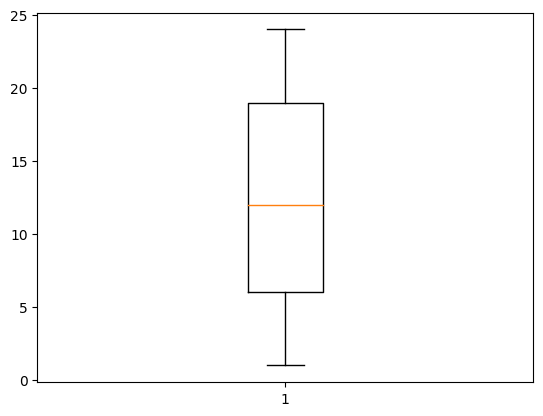

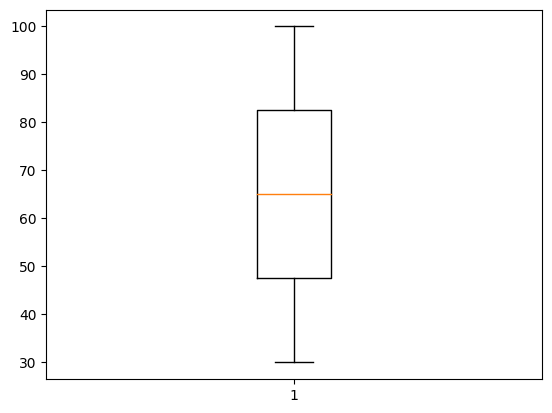

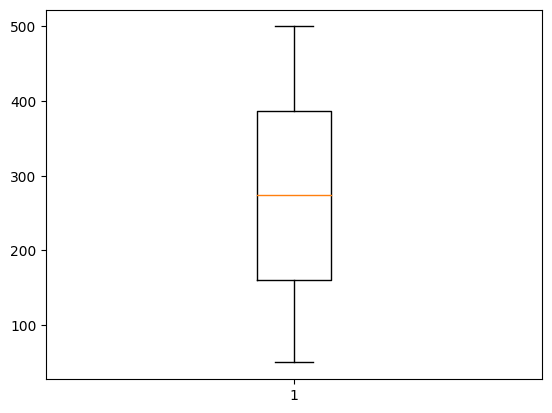

In [80]:
#plot box-plot for finding outliers in the need numerical columns
plt.boxplot(data['Age'])
plt.show()
plt.boxplot(data['Subscription_Length_Months'])
plt.show()
plt.boxplot(data['Monthly_Bill'])
plt.show()
plt.boxplot(data['Total_Usage_GB'])
plt.show()

## it can clearly seen from box plot that dataset don't have any outliers

Now Lets convert required categorical variable like gender and location in numerical as most machine learning algorithm which we will further will require a numerical input, We will use One-Hot Encoding for conversion.

In [81]:
data = pd.get_dummies(data, columns=['Location', 'Gender'], prefix=['Location', 'Gender'])

In [82]:
data.head()

,CustomerID,Name,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Gender_Female,Gender_Male
0,1,Customer_1,63,17,73.36,236,0,0,0,1,0,0,0,1
1,2,Customer_2,62,1,48.76,172,0,0,0,0,0,1,1,0
2,3,Customer_3,24,5,85.47,460,0,0,0,1,0,0,1,0
3,4,Customer_4,36,3,97.94,297,1,0,0,0,1,0,1,0
4,5,Customer_5,46,19,58.14,266,0,0,0,0,1,0,1,0


Before applying the feature scaling or normalization we will test different algorithms and check their accuracy score, if they perform well and good then we won't do scaling/normalization in this dataset.

For model selection we will select three models and compare their accuracy to find the best fit.


1.   Logistic Regression: It is simple and interpretable algorithm,
mainly used for binary classification. It is a good starting point for a small dataset and want a baseline model. Sometimes simple algorithms performs well.
2.   Random Forest: Ensemble learning algorithm, can handle both classification and regression task. Often performs well on datasets without much tuning. So random forest will be a good choice.
3.   Neural Network(Deep learning): this algorithm can capture complex patterns and relationship in the data. It requires more preprocessing and tuning, but can perform well than other algorithms.

In [83]:
#logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score

In [84]:
#split training and testing data
X = data.drop(['Churn','CustomerID', 'Name'], axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [85]:
#create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)
#make predictions
y_pred = model.predict(X_test)

In [86]:
#check accuracy of the model
accuracy_logistic = accuracy_score(y_test, y_pred)
print(accuracy_logistic)
recall_logistic = recall_score(y_test, y_pred)
print("recall score: ",recall_logistic)

0.4999
recall score:  0.29412357625239394


In [55]:
#Neural Networks (Deep Learning)

import tensorflow as tf
from tensorflow import keras

In [56]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5).astype(int)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print("recall-score: ", recall)

Epoch 1/10
2000/2000 [==============================] - 7s 3ms/step - loss: 0.9952 - accuracy: 0.4995 - val_loss: 0.6932 - val_accuracy: 0.4961
Epoch 2/10
2000/2000 [==============================] - 7s 3ms/step - loss: 0.6941 - accuracy: 0.5019 - val_loss: 0.6932 - val_accuracy: 0.4961
Epoch 3/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.6935 - accuracy: 0.4995 - val_loss: 0.6933 - val_accuracy: 0.4961
Epoch 4/10
2000/2000 [==============================] - 7s 4ms/step - loss: 0.6935 - accuracy: 0.5021 - val_loss: 0.6933 - val_accuracy: 0.4961
Epoch 5/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.6933 - accuracy: 0.5030 - val_loss: 0.6933 - val_accuracy: 0.4961
Epoch 6/10
2000/2000 [==============================] - 7s 4ms/step - loss: 0.6935 - accuracy: 0.5034 - val_loss: 0.6933 - val_accuracy: 0.4961
Epoch 7/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.6934 - accuracy: 0.5025 - val_loss: 0.6932 - val_accuracy:

In [87]:
# RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

In [88]:
model = RandomForestClassifier(n_estimators=100, random_state =42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(accuracy)
print("recall score: ", recall)

0.49545
recall score:  0.4756576957967947


Ok now after running all the machine learning models. I have evaluated our model accuracy based upon their recall score, gives us the score of all positive instances correctly identified by the model. By using recall score we can conclude that random forest is able to identify **appoximately 47.5% positive instances and Random Forest basically outperforms Logistic Regression** and Neural Networks in identifying positive instances.

Performance of the Random Forest can be further Increased by using the bigger and better dataset. Class Imbalance and more in-depth data understanding will also be helpful in increasing the accuracy of the model.

Now let's do cross validation to increase the accuracy

In [89]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you have your feature matrix X and target variable y ready

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform k-fold cross-validation (e.g., 5-fold)
num_folds = 5
cv_scores = cross_val_score(rf_classifier, X, y, cv=num_folds, scoring='accuracy')  # You can use 'recall', 'precision', or other metrics

# Print the cross-validation scores
for fold, score in enumerate(cv_scores, start=1):
    print(f'Fold {fold}: {score:.4f}')

# Calculate and print the mean and standard deviation of the scores
mean_score = cv_scores.mean()
std_score = cv_scores.std()

print(f'Mean Accuracy: {mean_score:.4f}')
print(f'Standard Deviation: {std_score:.4f}')


Fold 1: 0.5016
Fold 2: 0.4974
Fold 3: 0.4955
Fold 4: 0.4989
Fold 5: 0.5009
Mean Accuracy: 0.4988
Standard Deviation: 0.0022


Random Forest model's performance in terms of accuracy is consistent across the five folds with accuracy values ranging from approximately 0.4955 to 0.5016. the mean accuracy of 0.4988 suggests that the model is correctly classifying the data slightly better than random chance.

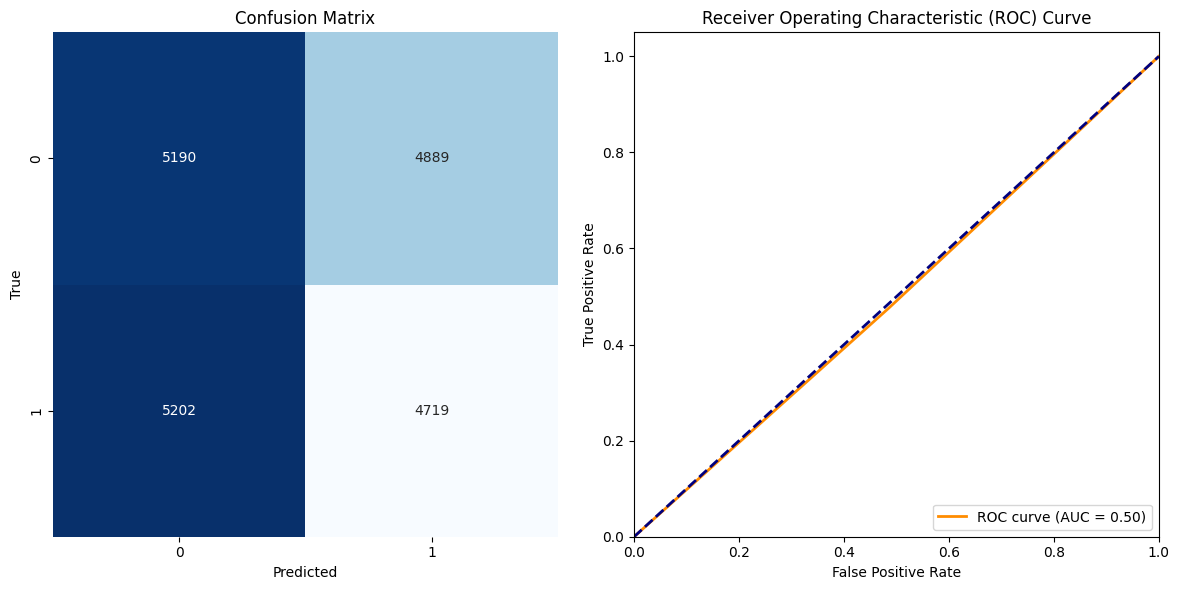

Model Performance Metrics
Accuracy: 0.4955
Precision: 0.4960
Recall: 1.0000
ROC AUC: 0.4953
Average Precision: 0.4937


In [94]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import seaborn as sns

# Assuming you have already trained a model (e.g., Random Forest) and made predictions

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Calculate Precision-Recall curve and Average Precision
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

# Generate and display visualizations
plt.figure(figsize=(12, 6))

# Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# ROC Curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


# Print model performance metrics
print("Model Performance Metrics")
print(f"Accuracy: {accuracy:.4f}")

# Precision, recall, and F1-score may be arrays; format them accordingly
print(f"Precision: {precision[0]:.4f}")  # Precision is an array, so access the value you need (e.g., [0] for class 0)
print(f"Recall: {recall[0]:.4f}")        # Recall is an array, so access the value you need (e.g., [0] for class 0)

print(f"ROC AUC: {roc_auc:.4f}")
print(f"Average Precision: {average_precision:.4f}")


In [72]:
import joblib
import pandas as pd

# Take input from the user
print("Enter zero if that is not applicable for You.")
Age = float(input("Enter the value for age: "))
Subscription_Length_Months = float(input("Enter the value for months: "))
Monthly_Bill = float(input("Enter the value for Bill: "))
Total_Usage_GB = float(input("Enter the value for usage in GB: "))
Location_Chicago = int(input("Enter the value for chicago: "))
Location_Houston = int(input("Enter the value for houston: "))
Location_Los_Angeles = int(input("Enter the value for LA: "))
Location_Miami = int(input("Enter the value for miami: "))
Location_New_York = int(input("Enter the value for NY: "))
Gender_Female = int(input("Enter the value for female: "))
Gender_Male = int(input("Enter the value for male: "))
# Add more input prompts for additional features as needed

# Create a DataFrame with the user's input
user_input = pd.DataFrame({
    'Age': [Age],
    'Subscription_Length_Months': [Subscription_Length_Months],
    'Monthly_Bill': [Monthly_Bill],
    'Total_Usage_GB': [Total_Usage_GB],
    'Location_Chicago': [Location_Chicago],
    'Location_Houston': [Location_Houston],
    'Location_Los Angeles': [Location_Los_Angeles],
    'Location_Miami': [Location_Miami],
    'Location_New York': [Location_New_York],
    'Gender_Female': [Gender_Female],
    'Gender_Male': [Gender_Male],
})

# user_input = pd.get_dummies(user_input, columns=['Location', 'Gender'], prefix=['Location', 'Gender'])
user_input
# Make predictions on the user's input
predictions = model.predict(user_input)

# Print the predictions
print("Churn Prediction:")
if predictions[0] == 0:
    print("Not Churned")
else:
    print("Churned")


Enter the value for Feature1: 36
Enter the value for Feature4: 3
Enter the value for Feature5: 97
Enter the value for Feature6: 297
Enter the value for c: 0
Enter the value for h: 0
Enter the value for l: 0
Enter the value for m: 1
Enter the value for n: 0
Enter the value for male: 0
Enter the value for female: 1
1/1 [==============================] - 0s 26ms/step
Churn Prediction:
Churned
